Avocado Project

Project Description

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data 
comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes 
an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) 
    in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) 
are not included in this table.
Some relevant columns in the dataset:
    
•	Date - The date of the observation
•	AveragePrice - the average price of a single avocado
•	type - conventional or organic
•	year - the year
•	Region - the city or region of the observation
•	Total Volume - Total number of avocados sold
•	4046 - Total number of avocados with PLU 4046 sold
•	4225 - Total number of avocados with PLU 4225 sold
•	4770 - Total number of avocados with PLU 4770 sold

Inspiration /Label

The dataset can be seen in two angles to find the region and find the average price .
Task: One of Classification and other of Regression
Do both tasks in the same .ipynb file and submit at single file. 


Dataset Link-
•	https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip


# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import warnings
warnings.filterwarnings('ignore')


# Importing dataset

In [2]:
df=pd.read_csv("avocado.csv")
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,04-02-2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


This is a regression and classification both type machine learning problem because the goal is to predict a continuous and discrete numeric output variable in this data set numerical data and categorical data is present

In [3]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df.sample(10)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
7064,03-09-2017,1.57,227168.31,129857.31,26734.97,290.73,70285.30,56267.76,9259.77,4757.77,conventional,2017,NewOrleansMobile
17893,25-02-2018,1.60,10821.89,652.89,894.42,0.00,9274.58,7767.78,1506.80,0.00,organic,2018,MiamiFtLauderdale
1591,24-05-2015,1.04,512172.44,2624.76,372289.48,53.34,137204.86,137204.86,0.00,0.00,conventional,2015,NorthernNewEngland
2853,14-02-2016,1.13,98008.16,1640.86,77133.01,12.00,19222.29,17663.46,1558.83,0.00,conventional,2016,Albany
9383,18-01-2015,2.00,2209.34,4.22,834.34,0.00,1370.78,1370.78,0.00,0.00,organic,2015,Boston
10579,18-01-2015,0.98,4739.17,256.53,2.64,0.00,4480.00,4480.00,0.00,0.00,organic,2015,NewOrleansMobile
2552,29-11-2015,1.41,35852.68,719.36,21285.35,8.89,13839.08,13839.08,0.00,0.00,conventional,2015,Syracuse
16291,01-10-2017,1.70,236097.14,9408.76,23215.19,79.66,203393.53,203353.59,39.94,0.00,organic,2017,Northeast
9238,01-11-2015,1.60,9421.09,3323.30,4105.67,687.55,1304.57,935.87,368.70,0.00,organic,2015,BaltimoreWashington
6573,10-12-2017,0.79,1266364.71,459265.36,294180.18,6828.23,506090.94,416839.01,89251.93,0.00,conventional,2017,Houston


# Cleaning the data

In [5]:
#checking the null value of  column of dataset
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

we observe that there is null value is present in  columns

In [6]:
print("Number of null or missing values in dataset",df.isnull().sum().sum())

Number of null or missing values in dataset 0


<Axes: >

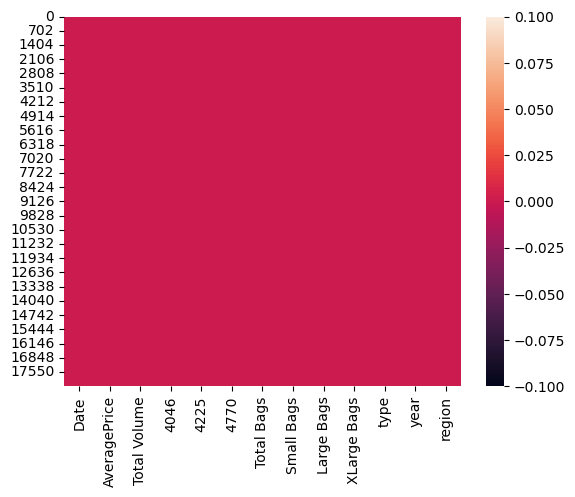

In [7]:
#checking the null value of  column of dataset by heat map
sns.heatmap(df.isnull())

we observe by heat map that there is no null value  present in any columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


 we observe that there is no null value present in any column,and all datatypes seem to int,object and float

# Exploratory Data Analysis(EDA)

In [9]:
#checking the shape of dataset
df.shape

(18249, 13)

we observe that there 18249 row and 13 columns is present in this dataset

In [10]:
#checking the column of dataset
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

there are 12 no of column is present out of which type our target 

In [11]:
# to convert index from row to column
df.columns.tolist()


['Date',
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'type',
 'year',
 'region']

In [12]:
#checking the types of column of dataset
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

We observe there are  object type,int and float datatype are present

In [13]:
df.nunique().to_frame("No. of unique values")

,No. of unique values
Date,169
AveragePrice,259
Total Volume,18237
4046,17702
4225,18103
4770,12071
Total Bags,18097
Small Bags,17321
Large Bags,15082
XLarge Bags,5588


mostly all column have unique value in all column there  54 unique value present in target

In [14]:
#checking the null value of all column of dataset
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

27-12-2015    108
24-12-2017    108
10-12-2017    108
03-12-2017    108
26-11-2017    108
             ... 
06-11-2016    108
07-01-2018    108
18-06-2017    107
25-06-2017    107
06-12-2015    107
Name: Date, Length: 169, dtype: int64


1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64


4103.97       2
3529.44       2
46602.16      2
13234.04      2
3713.49       2
             ..
874349.55     1
1621253.97    1
830499.38     1
845065.66     1
17489.58      1
Name: Total Volume, Length: 18237, dtype: int64


0.00       242
3.00        10
4.00         8
1.24         8
1.00         8
          ... 
1486.31      1
1761.80      1
1772.26      1
1803.39      1
2894.77      1
Name: 4046, Length: 17702, dtype: int64


0.00         61
177.87        3
215.36        3
1.30          3
1.26          3
             ..
417905.67     1
275986.91     1
277789.30     1
37815

These are the value counts of all columns and we have seen there is  no white space are present

In [15]:
#checking the list of counts of target
df["region"].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

appox all are unique value

In [16]:
df["region"].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

there are 54 Unique value are present

In [17]:
#checking the categorical& numerical value of all column of dataset
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical columns:",categorical_col)
print("\n")

numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical columns:",numerical_col)

Categorical columns: ['Date', 'type', 'region']


Numerical columns: ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']


There are 10 Numerical column are present and 3 Categorical columns also present

# Description of data set

In [18]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


This gives the all statical information of the numerical columns.There is no negative or invalid value is present
hence we can say that it is perfect we can observe these points: 

    1.The counts of all columns are same it means there is no missing value in any column
    
    2.The mean value and median(50%) in all columns are apoximately high it means that data set is skewed in  right direction         and it is not normally distributed  columns which means the data is  skewed  in these columns 
    
    3.There is 4046 and total bagas columns in which mean value is less than median(50%) hence there  left skewed 
    
    4.There is  major difference beteen 75% and max in xtralarge bag it means there is outliers are present in these columns
    
    5.In this discription min,std and 25% detail also found

# Data visualization

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64


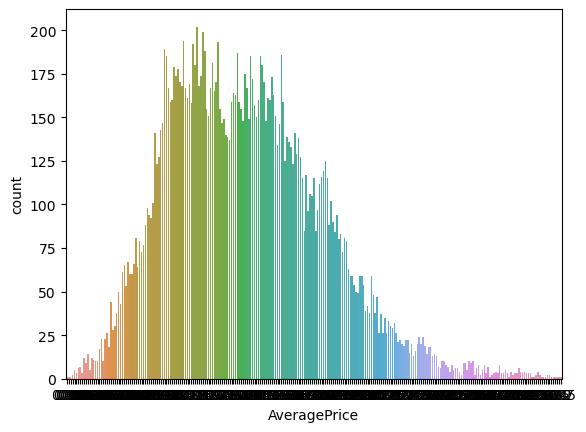

In [19]:
#visualizing the Average Price
ax=sns.countplot(x='AveragePrice',data=df)
print(df['AveragePrice'].value_counts())

we observe that average price is normaly distributed

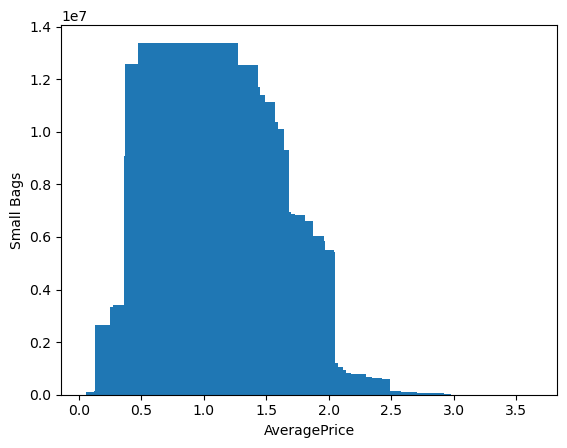

In [20]:
plt.bar(df['AveragePrice'], df['Small Bags'])
plt.xlabel('AveragePrice')
plt.ylabel('Small Bags')
plt.show()

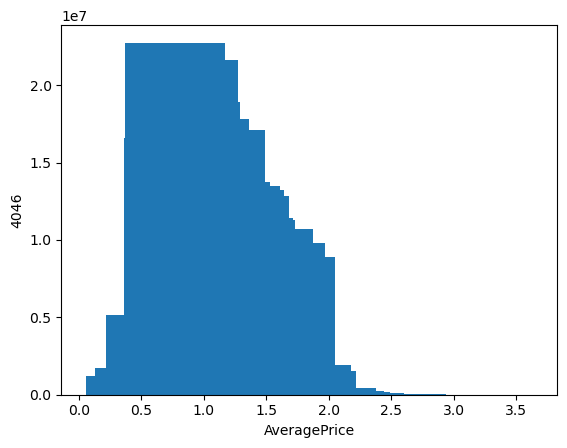

In [21]:
plt.bar(df['AveragePrice'], df['4046'])
plt.xlabel('AveragePrice')
plt.ylabel('4046')
plt.show()

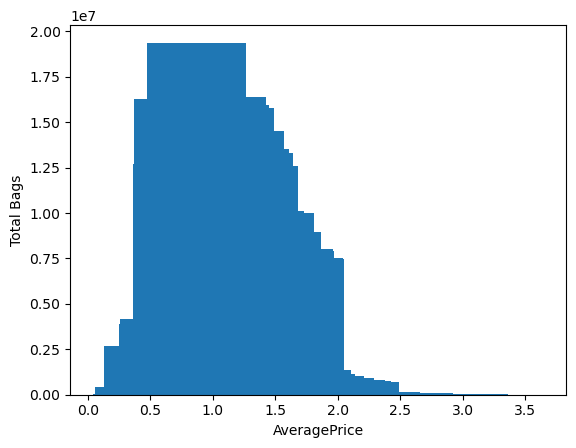

In [22]:
plt.bar(df['AveragePrice'], df['Total Bags'])
plt.xlabel('AveragePrice')
plt.ylabel('Total Bags')
plt.show()

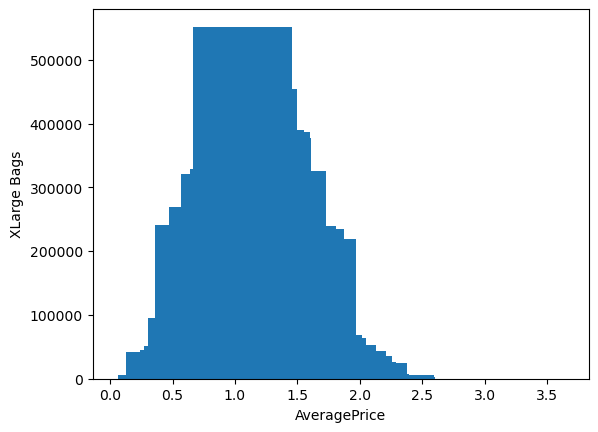

In [23]:
plt.bar(df['AveragePrice'], df['XLarge Bags'])
plt.xlabel('AveragePrice')
plt.ylabel('XLarge Bags')
plt.show()

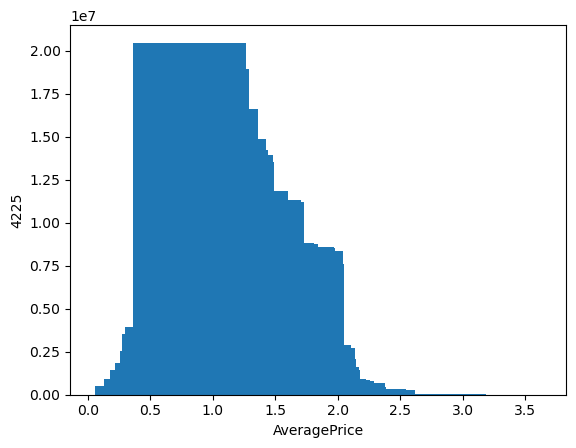

In [24]:
plt.bar(df['AveragePrice'], df['4225'])
plt.xlabel('AveragePrice')
plt.ylabel('4225')
plt.show()

# Preprocessing

In [25]:
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['type']=le.fit_transform(df['type'])
df['type']

0        0
1        0
2        0
3        0
4        0
        ..
18244    1
18245    1
18246    1
18247    1
18248    1
Name: type, Length: 18249, dtype: int32

In [26]:
df['region']=le.fit_transform(df['region'])
df['region']

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 18249, dtype: int32

we drop date because it will not requred for prediction

In [27]:
df.drop(['Date'], axis=1, inplace=True)

In [28]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


In [29]:
#checking the types of column of dataset
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year              int64
region            int32
dtype: object

we observe that all column are converted in numerical column

# checking skewness

In [30]:
#checking skewness
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
dtype: float64

# Reduce skewness

In [31]:
df['Total Volume'] = np.cbrt(df['Total Volume'])

In [32]:
df['4046'] = np.cbrt(df['4046'])

In [33]:
df['4225'] = np.cbrt(df['4225'])

In [34]:
df['4770'] = np.cbrt(df['4770'])

In [35]:
df['Total Bags'] = np.cbrt(df['Total Bags'])

In [36]:
df['Small Bags'] = np.cbrt(df['Small Bags'])

In [37]:
df['Large Bags'] = np.cbrt(df['Large Bags'])

In [38]:
df['XLarge Bags'] = np.cbrt(df['XLarge Bags'])

In [39]:
df['Total Bags'] = np.cbrt(df['Total Bags'])

In [40]:
#checking skewness
df.skew()

AveragePrice    0.580303
Total Volume    2.236143
4046            2.277861
4225            2.130378
4770            2.316048
Total Bags      0.473809
Small Bags      2.217682
Large Bags      2.186514
XLarge Bags     2.842255
type            0.000329
year            0.215339
region          0.000030
dtype: float64

In [41]:
df.groupby('type').mean()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
type,,,,,,,,,,,
0,1.158040,89.295487,56.462231,61.304393,22.181494,3.763671,52.310457,29.506709,8.762485,2016.147929,26.500000
1,1.653999,26.815673,12.233655,16.927850,2.327480,2.633414,17.421845,10.107570,0.056781,2016.147868,26.491286


In [42]:
df.groupby('region').mean()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
region,,,,,,,,,,,
0,1.561036,28.707324,8.641377,23.726722,2.599031,2.572924,16.954689,5.279145,1.295392,0.500000,2016.147929
1,1.337959,50.767912,38.364469,26.665783,3.793658,3.087953,26.972636,25.227434,3.412750,0.500000,2016.147929
2,1.534231,59.615786,26.274813,48.695980,16.898639,3.301384,38.773176,10.144090,2.949140,0.500000,2016.147929
3,1.348136,28.235366,18.120921,13.259438,8.634414,2.616315,17.424314,9.295724,1.436641,0.500000,2016.147929
4,1.530888,52.471272,11.409671,42.581843,8.384098,3.200317,34.128273,10.328689,1.803152,0.500000,2016.147929
5,1.516834,33.492429,8.272309,22.755727,2.412860,2.950259,25.647877,8.863079,1.589562,0.500000,2016.147929
6,1.395325,116.520522,81.186826,82.662628,28.714532,4.007873,70.548226,22.456660,14.198749,0.500000,2016.147929
7,1.606036,38.610166,20.356967,27.508528,17.418446,2.881088,25.851376,10.001229,1.346892,0.500000,2016.147929
8,1.556775,60.911794,22.464159,53.713291,24.389745,2.930415,28.246393,8.386759,4.786157,0.500000,2016.147929


we observe that maximum bags are conventional type and with high percentage of volume

# Correlation Matrix and Heatmap

In [43]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
AveragePrice,1.000000,-0.488566,-0.499613,-0.416745,-0.433402,-0.557007,-0.437754,-0.430645,-0.302900,0.615845,0.093197,-0.011716
Total Volume,-0.488566,1.000000,0.936579,0.959318,0.855680,0.908233,0.960888,0.813446,0.736414,-0.648185,0.049149,0.156074
4046,-0.499613,0.936579,1.000000,0.826342,0.790790,0.819991,0.880089,0.769275,0.693262,-0.601513,0.012694,0.218500
4225,-0.416745,0.959318,0.826342,1.000000,0.845655,0.846180,0.904775,0.735340,0.691925,-0.633736,-0.004311,0.108452
4770,-0.433402,0.855680,0.790790,0.845655,1.000000,0.744556,0.809414,0.639581,0.729334,-0.594900,-0.062421,0.056363
Total Bags,-0.557007,0.908233,0.819991,0.846180,0.744556,1.000000,0.925654,0.792606,0.653463,-0.709054,0.202806,0.127325
Small Bags,-0.437754,0.960888,0.880089,0.904775,0.809414,0.925654,1.000000,0.764841,0.742418,-0.605591,0.143385,0.151884
Large Bags,-0.430645,0.813446,0.769275,0.735340,0.639581,0.792606,0.764841,1.000000,0.592155,-0.461433,0.166212,0.199268
XLarge Bags,-0.302900,0.736414,0.693262,0.691925,0.729334,0.653463,0.742418,0.592155,1.000000,-0.490964,0.151598,0.036732
type,0.615845,-0.648185,-0.601513,-0.633736,-0.594900,-0.709054,-0.605591,-0.461433,-0.490964,1.000000,-0.000032,-0.000280


In [44]:
correlations = df.corr()['region'].sort_values(ascending=False)
print(correlations)

region          1.000000
4046            0.218500
Large Bags      0.199268
Total Volume    0.156074
Small Bags      0.151884
Total Bags      0.127325
4225            0.108452
4770            0.056363
XLarge Bags     0.036732
year           -0.000055
type           -0.000280
AveragePrice   -0.011716
Name: region, dtype: float64


<Axes: >

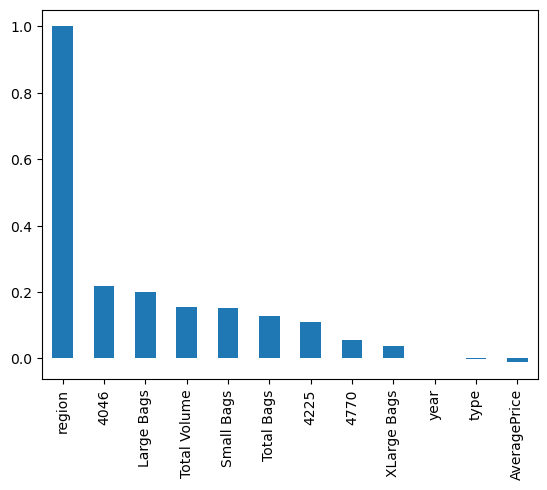

In [45]:
correlations.plot(kind='bar')

From this barplot we can observe, some obvious feature correlations such as AveragePrice,Total Volume,4046, 4225,4770,Total Bags, Small Bags, Large Bags, XLarge Bags, type, year, region are  positively correlated correlated, barplot show value between +0.2

<Axes: >

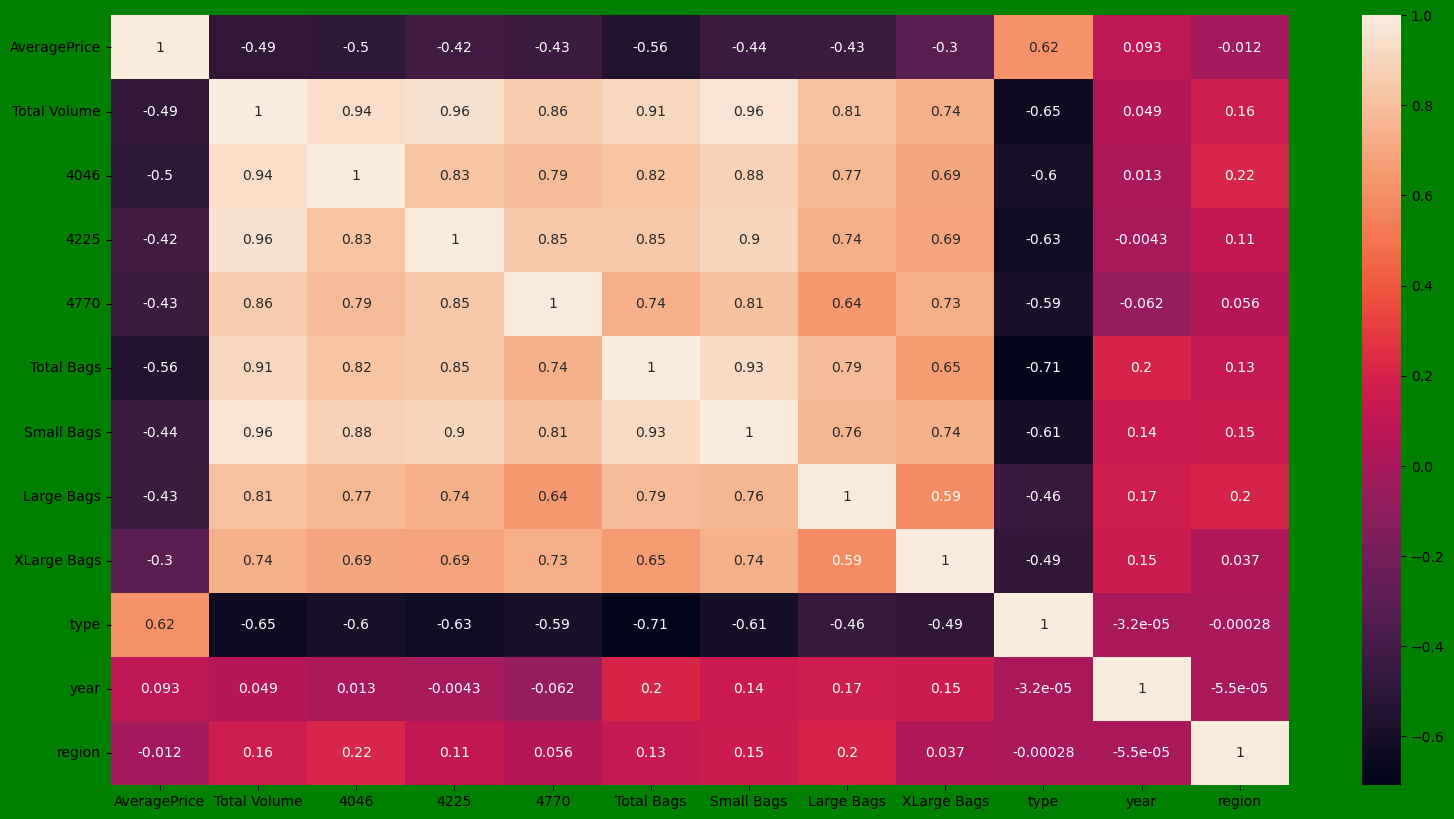

In [46]:
# ploting heatmap
plt.figure(figsize=[19,10],facecolor='green')
sns.heatmap(df.corr(),annot=True)

From this heatmap we can observe, some obvious feature correlations such as 4046,4225,4770,total bag is highly correlated with  Total Volume up td 0.91 and 4046,4225,4770 also high correlated with three type of bag so we will drop high correlated features  we have observe that type ,year, region are negatively correlated . so we are going to stablish a minimum threshold of correlation approximately around 0.2 (absolut value) since we do not have to take into account features whose values might be redundant and not provide information at all.

In [47]:
print(abs(correlations) > 0.2)

region           True
4046             True
Large Bags      False
Total Volume    False
Small Bags      False
Total Bags      False
4225            False
4770            False
XLarge Bags     False
year            False
type            False
AveragePrice    False
Name: region, dtype: bool


From all the values, we are selecting 4046,4225,4770,total bag in order to study them better and see the distribution of values that separate the different qualities these are negatively effect region

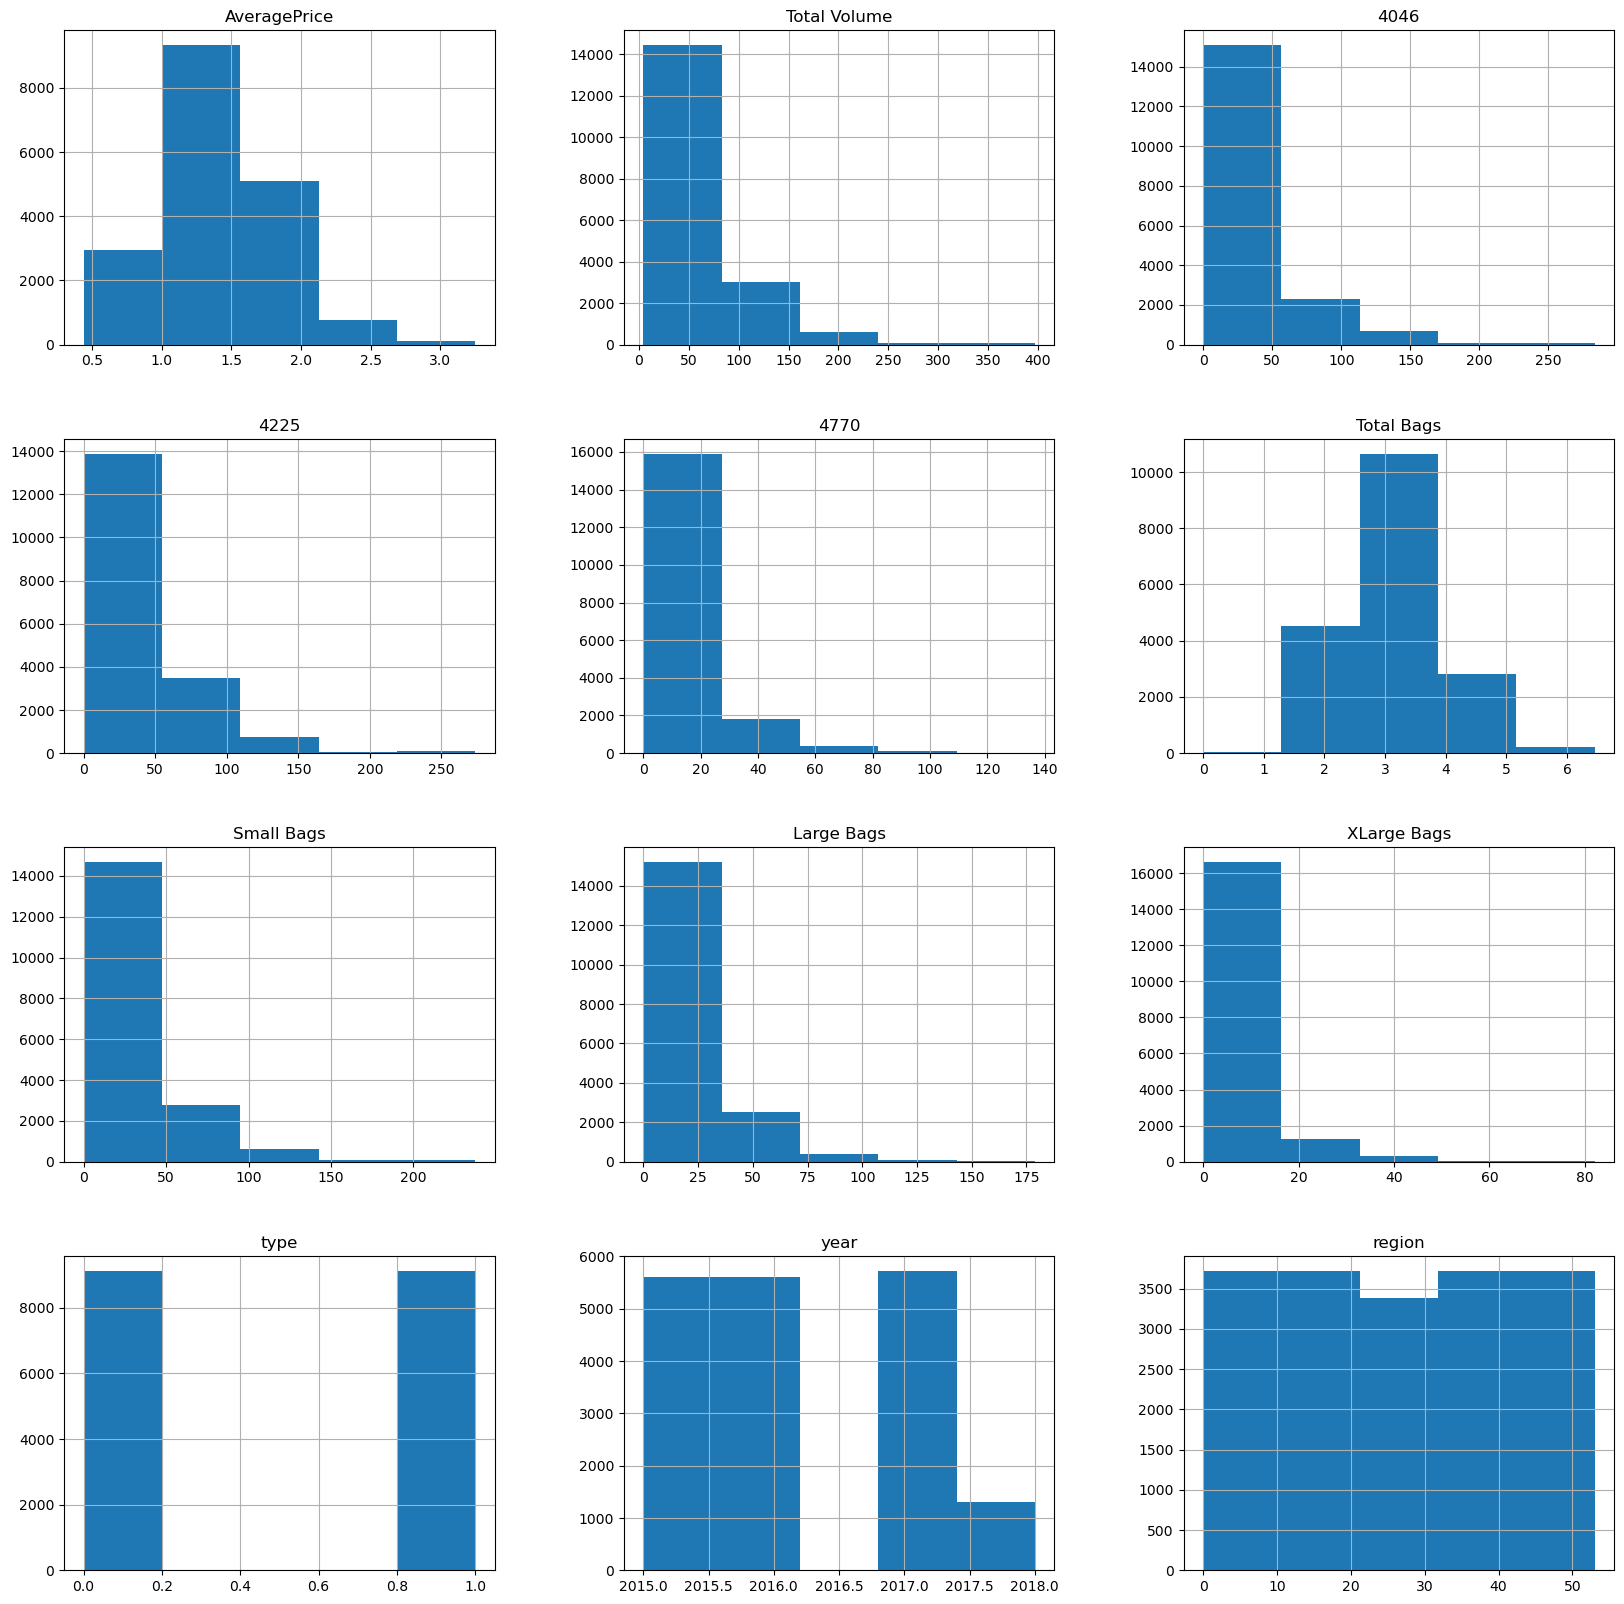

In [48]:
df.hist(bins=5, figsize=(20, 20))
plt.show()

we observe now all features are normaly distributed

# Feature Selection

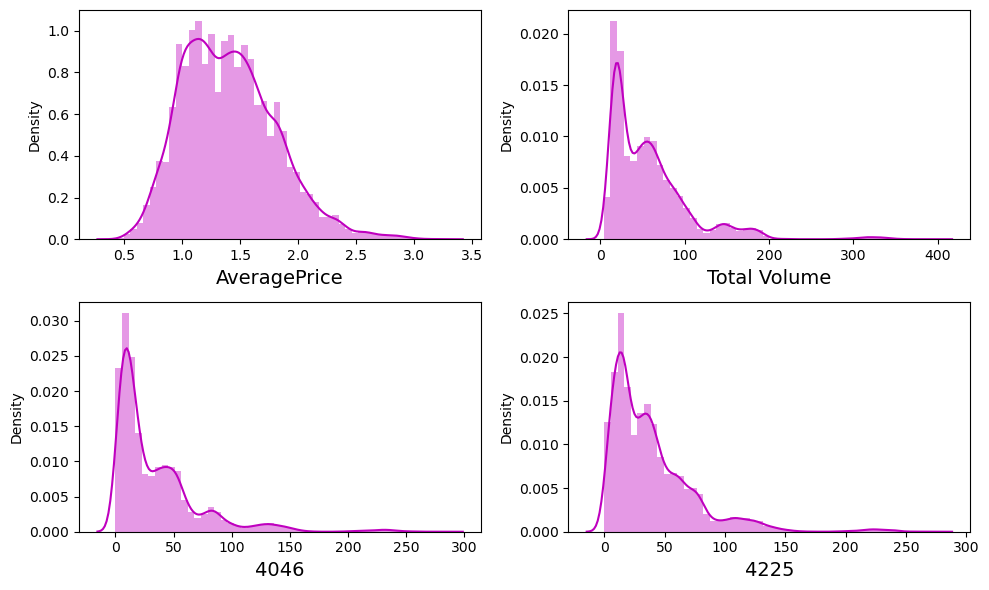

In [49]:
#checking how data is distributed
plt.figure(figsize=(10,6), facecolor ="white")
plotnumber =1
for col in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[col],color= "m")
        plt.xlabel(col, fontsize = 14)
        plt.yticks(rotation =0,fontsize = 10 )
    plotnumber+=1
plt.tight_layout()

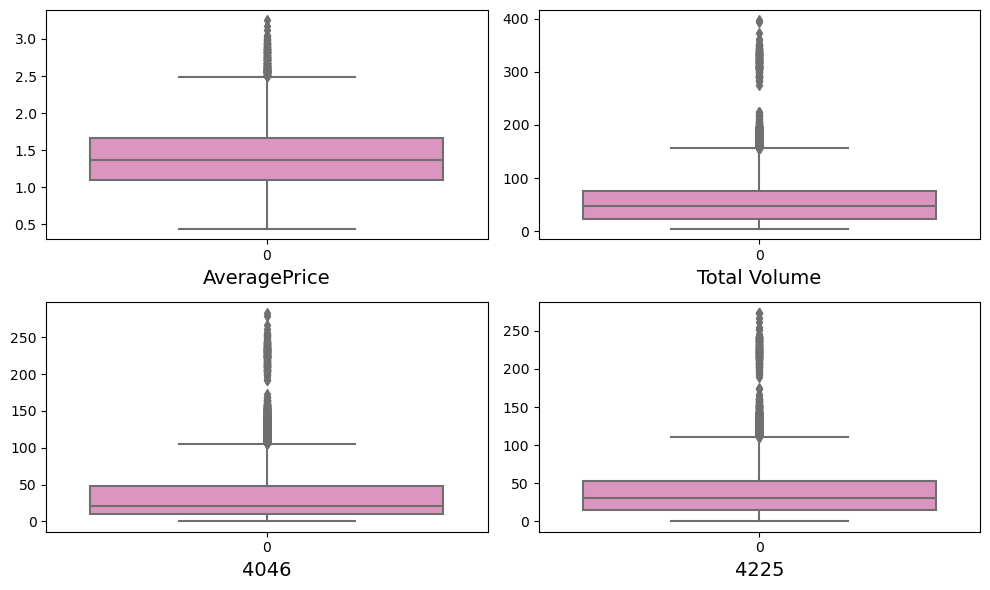

In [50]:
#checking for outliers
plt.figure(figsize=(10,6), facecolor ="white")
plotnumber =1
for col in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[col], palette = "Set2_r")
        plt.xlabel(col, fontsize = 14)
        plt.yticks(rotation =0,fontsize = 10 )
    plotnumber+=1
plt.tight_layout()

In [51]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,40.049235,10.120997,37.903460,3.638275,2.739725,20.490870,4.534711,0.0,0,2015,0
1,1.35,38.001150,8.768933,35.473513,3.878204,2.766926,21.110581,4.602425,0.0,0,2015,0
2,0.93,49.079175,9.262632,47.790416,5.072283,2.719854,20.035113,4.689671,0.0,0,2015,0
3,1.08,42.906983,10.421946,41.597133,4.171309,2.619699,17.839520,5.114173,0.0,0,2015,0
4,1.28,37.093893,9.800999,35.260208,4.231732,2.637860,18.157325,5.825433,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,25.750488,12.697058,11.520945,0.000000,2.876877,23.553564,7.558651,0.0,1,2018,53
18245,1.71,24.037003,10.602029,15.083241,0.000000,2.759051,20.754542,6.873934,0.0,1,2018,53
18246,1.87,23.966829,10.602681,13.486113,8.995636,2.763302,21.068409,3.484558,0.0,1,2018,53
18247,1.93,25.305697,11.517001,14.392048,8.991803,2.811317,22.185443,3.684031,0.0,1,2018,53


we observe now all features are not normaly distributed for that we reduce skewness to get normally distributed feature

In [52]:
#checking skewness
df.skew()

AveragePrice    0.580303
Total Volume    2.236143
4046            2.277861
4225            2.130378
4770            2.316048
Total Bags      0.473809
Small Bags      2.217682
Large Bags      2.186514
XLarge Bags     2.842255
type            0.000329
year            0.215339
region          0.000030
dtype: float64

In [53]:
df['Total Volume']=np.cbrt(df['Total Volume'])

In [54]:
df['4046']=np.cbrt(df['4046'])

In [55]:
df['4225']=np.cbrt(df['4225'])

In [56]:
df['4770']=np.cbrt(df['4770'])

In [57]:
df['Small Bags']=np.cbrt(df['Small Bags'])

In [58]:
df['Large Bags']=np.cbrt(df['Large Bags'])

In [59]:
df['XLarge Bags']=np.cbrt(df['XLarge Bags'])

In [60]:
#checking skewness
df.skew()

AveragePrice    0.580303
Total Volume    0.624128
4046            0.296549
4225            0.248376
4770           -0.014697
Total Bags      0.473809
Small Bags      0.043672
Large Bags     -0.499222
XLarge Bags     1.023563
type            0.000329
year            0.215339
region          0.000030
dtype: float64

we observed skewness is reduced

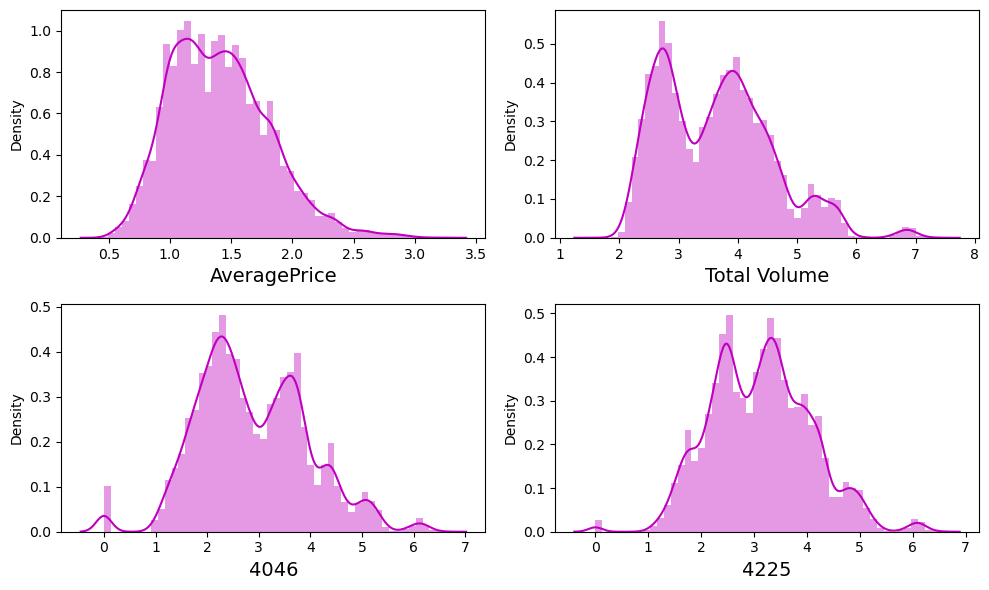

In [61]:
#checking how data is distributed
plt.figure(figsize=(10,6), facecolor ="white")
plotnumber =1
for col in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[col],color= "m")
        plt.xlabel(col, fontsize = 14)
        plt.yticks(rotation =0,fontsize = 10 )
    plotnumber+=1
plt.tight_layout()

we observe that features are normally distributed

# Cleaning of Data

In [62]:
df = df.drop(['Large Bags'], axis=1)

In [63]:
df = df.drop(['type'], axis=1)

In [64]:
df = df.drop(['year'], axis=1)

In [65]:
df = df.drop(['4770'], axis=1)

In [66]:
df = df.drop(['Total Volume'], axis=1)

we observe that these  features are creat multicollinearity problem this is the reason to drop it

In [67]:
df

,AveragePrice,4046,4225,Total Bags,Small Bags,XLarge Bags,region
0,1.33,2.163089,3.359126,2.739725,2.736445,0.0,0
1,1.35,2.062128,3.285752,2.766926,2.763758,0.0,0
2,0.93,2.100123,3.628944,2.719854,2.716005,0.0,0
3,1.08,2.184320,3.464877,2.619699,2.612930,0.0,0
4,1.28,2.140048,3.279153,2.637860,2.628355,0.0,0
...,...,...,...,...,...,...,...
18244,1.63,2.332926,2.258548,2.876877,2.866502,0.0,53
18245,1.71,2.196829,2.470766,2.759051,2.748133,0.0,53
18246,1.87,2.196874,2.380285,2.763302,2.761917,0.0,53
18247,1.93,2.258290,2.432433,2.811317,2.809890,0.0,53


# Split data into features and labels for classification

In [68]:
x_classification = df.drop(['region'], axis=1)
y_classification = df['region']

# Feature Scaling using Standard Scalarization

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_classification=pd.DataFrame(scaler.fit_transform(x_classification), columns = x_classification.columns)
x_classification

,AveragePrice,4046,4225,Total Bags,Small Bags,XLarge Bags
0,-0.188689,-0.678881,0.247619,-0.575785,-0.362142,-0.676729
1,-0.139020,-0.773376,0.170103,-0.541656,-0.330054,-0.676729
2,-1.182069,-0.737814,0.532667,-0.600717,-0.386157,-0.676729
3,-0.809551,-0.659010,0.359339,-0.726378,-0.507256,-0.676729
4,-0.312861,-0.700447,0.163131,-0.703592,-0.489134,-0.676729
...,...,...,...,...,...,...
18244,0.556347,-0.519922,-0.915081,-0.403704,-0.209344,-0.676729
18245,0.755023,-0.647302,-0.690885,-0.551537,-0.348411,-0.676729
18246,1.152375,-0.647260,-0.786473,-0.546203,-0.332217,-0.676729
18247,1.301382,-0.589777,-0.731382,-0.485960,-0.275855,-0.676729


we scale the data to overcome biasness

# checking variance inflation Factor(vif)

In [70]:
#find vif in each scaled column
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif["VIF values"] =[variance_inflation_factor(x_classification.values, i)
                    for i in range (len(x_classification.columns))]
vif["Features"] = x_classification.columns
vif

,VIF values,Features
0,1.548856,AveragePrice
1,3.799161,4046
2,4.040196,4225
3,14.346038,Total Bags
4,9.844941,Small Bags
5,1.962728,XLarge Bags


we observe by checking vif values the feature  causing multicollineraity problem. in Total bags column and small bags columns 
vif value is more than 10 these column will drop to reduce multicollineraity problem

In [71]:
y_classification.value_counts()

0     338
40    338
29    338
30    338
31    338
32    338
33    338
34    338
35    338
36    338
37    338
38    338
39    338
41    338
1     338
42    338
43    338
44    338
45    338
46    338
47    338
48    338
49    338
50    338
51    338
52    338
28    338
27    338
26    338
25    338
2     338
3     338
4     338
5     338
6     338
7     338
8     338
9     338
10    338
11    338
12    338
13    338
14    338
15    338
16    338
17    338
18    338
19    338
20    338
21    338
22    338
23    338
24    338
53    335
Name: region, dtype: int64

# oversampling

In [72]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(x_classification,y_classification)

In [73]:
y1.value_counts()

0     338
40    338
29    338
30    338
31    338
32    338
33    338
34    338
35    338
36    338
37    338
38    338
39    338
41    338
1     338
42    338
43    338
44    338
45    338
46    338
47    338
48    338
49    338
50    338
51    338
52    338
28    338
27    338
26    338
25    338
2     338
3     338
4     338
5     338
6     338
7     338
8     338
9     338
10    338
11    338
12    338
13    338
14    338
15    338
16    338
17    338
18    338
19    338
20    338
21    338
22    338
23    338
24    338
53    338
Name: region, dtype: int64

we observe that all features are balanced

# Model Creation

Finding the best random state

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [75]:
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_classification_train, x_classification_test, y_classification_train, y_classification_test = train_test_split(x_classification, y_classification, test_size = 0.30, random_state = i)
    lr = LinearRegression()
    lr.fit(x_classification_train, y_classification_train)
    pred = lr.predict(x_classification_test)
    acc = r2_score(y_classification_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS  = i
print("Maximum r2 score is =",  maxAccu, "on random_state ", maxRS)

Maximum r2 score is = 0.09998607596931108 on random_state  192


# Creating train test split

In [76]:
x_classification_train, x_classification_test, y_classification_train, y_classification_test = train_test_split(x_classification, y_classification, test_size = 0.30, random_state = maxRS)

# classification algorithms

In [77]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

# RandomForestClassifier

In [78]:
# checking accuracy for RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(x_classification_train, y_classification_train)
predRFC= RFC.predict(x_classification_test)
print(accuracy_score(y_classification_test, predRFC)) 
print(confusion_matrix(y_classification_test, predRFC)) 
print(classification_report(y_classification_test, predRFC))

0.8102283105022831
[[ 86   0   0 ...   0   0   0]
 [  0  75   3 ...   0   0   2]
 [  0   1  92 ...   0   0   3]
 ...
 [  0   0   0 ... 114   0   0]
 [  0   0   0 ...   0  92   0]
 [  0   3   1 ...   0   0  73]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       104
           1       0.85      0.73      0.79       103
           2       0.86      0.79      0.82       117
           3       0.88      0.86      0.87        95
           4       0.84      0.82      0.83       108
           5       0.83      0.70      0.76        89
           6       0.93      0.96      0.95        85
           7       0.70      0.74      0.72       108
           8       0.89      0.91      0.90       112
           9       0.87      0.83      0.85       105
          10       0.64      0.75      0.69       106
          11       0.85      0.91      0.88       104
          12       0.93      0.82      0.87       112
          13       0.76      0.8

we observe that Random Forest Clssifier accuracy 80.6%

# support vector classifier

In [79]:
# checking accuracy for support vector classifier
svc = SVC()
svc.fit(x_classification_train, y_classification_train)
predsvc= svc.predict(x_classification_test)
print(accuracy_score(y_classification_test, predsvc)) 
print(confusion_matrix(y_classification_test, predsvc)) 
print(classification_report(y_classification_test, predsvc))

0.6160730593607306
[[ 82   0   0 ...   0   0   0]
 [  0  40   4 ...   0   0  10]
 [  0   0  75 ...   0   0   4]
 ...
 [  0   0   0 ... 112   0   0]
 [  0   0   0 ...   0  84   0]
 [  0   2   0 ...   0   0  54]]
              precision    recall  f1-score   support

           0       0.65      0.79      0.71       104
           1       0.56      0.39      0.46       103
           2       0.70      0.64      0.67       117
           3       0.72      0.71      0.71        95
           4       0.73      0.70      0.72       108
           5       0.45      0.49      0.47        89
           6       0.66      0.96      0.78        85
           7       0.36      0.29      0.32       108
           8       0.84      0.84      0.84       112
           9       0.65      0.70      0.68       105
          10       0.41      0.35      0.38       106
          11       0.66      0.92      0.77       104
          12       0.89      0.56      0.69       112
          13       0.51      0.5

we observe that support vector classifier accuracy 61%

# ExtraTreeClassifier

In [80]:
# checking accuracy for ExtraTreeClassifier
ET = ExtraTreeClassifier()
ET.fit(x_classification_train, y_classification_train)
predET= ET.predict(x_classification_test)
print(accuracy_score(y_classification_test, predET)) 
print(confusion_matrix(y_classification_test, predET)) 
print(classification_report(y_classification_test, predET))

0.5665753424657535
[[ 64   0   0 ...   0   0   0]
 [  0  48   2 ...   0   2   1]
 [  0   2  61 ...   1   0   2]
 ...
 [  0   0   0 ... 100   0   0]
 [  0   1   0 ...   0  68   0]
 [  1   3   2 ...   0   0  43]]
              precision    recall  f1-score   support

           0       0.62      0.62      0.62       104
           1       0.45      0.47      0.46       103
           2       0.69      0.52      0.59       117
           3       0.62      0.64      0.63        95
           4       0.71      0.74      0.72       108
           5       0.47      0.54      0.50        89
           6       0.68      0.85      0.75        85
           7       0.43      0.42      0.42       108
           8       0.79      0.80      0.80       112
           9       0.56      0.61      0.58       105
          10       0.38      0.39      0.38       106
          11       0.72      0.70      0.71       104
          12       0.64      0.48      0.55       112
          13       0.45      0.4

we observe that support vector classifier accuracy 60%

# LogisticRegression

In [81]:
# checking accuracy for LogisticRegression
LR = RandomForestClassifier()
LR.fit(x_classification_train, y_classification_train)
predLR= LR.predict(x_classification_test)
print(accuracy_score(y_classification_test, predLR)) 
print(confusion_matrix(y_classification_test, predLR)) 
print(classification_report(y_classification_test, predLR))


0.8065753424657535
[[ 88   0   0 ...   0   0   0]
 [  0  76   3 ...   0   0   2]
 [  0   0  92 ...   0   0   2]
 ...
 [  0   0   0 ... 114   0   0]
 [  0   0   0 ...   0  93   0]
 [  0   2   1 ...   0   0  72]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       104
           1       0.86      0.74      0.80       103
           2       0.86      0.79      0.82       117
           3       0.88      0.88      0.88        95
           4       0.88      0.83      0.86       108
           5       0.80      0.73      0.76        89
           6       0.92      0.93      0.92        85
           7       0.67      0.77      0.72       108
           8       0.90      0.90      0.90       112
           9       0.84      0.84      0.84       105
          10       0.65      0.75      0.69       106
          11       0.85      0.92      0.88       104
          12       0.94      0.78      0.85       112
          13       0.80      0.8

we observe that Logistic Regression  accuracy 80.69%

# Cross Validation Score

In [82]:
from sklearn.model_selection import cross_val_score

In [ ]:
cv=5--- it's a fold value 1,2,3,4,5

cross_val_score(modelname, features, targetvariable, cv=foldvalue, scoring='accuracy')


in classification algorithms- default scoring parameter- accuracy

for regression- deafult scoring parameter is - r2 score

In [83]:
# checking cv score for Random Forest Classifier
score = cross_val_score(RFC,x_classification,y_classification)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -" ,accuracy_score(y_classification_test, predRFC) - score.mean())

[0.47972603 0.67424658 0.63753425 0.52493151 0.35790628]
0.5348689263712708
Difference between Accuracy score and cross validation score is - 0.27535938413101224


In [84]:
# checking cv score for support vector classifier
score = cross_val_score(svc,x_classification,y_classification)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -" ,accuracy_score(y_classification_test, predsvc) - score.mean())

[0.44246575 0.58054795 0.53123288 0.46849315 0.26829268]
0.4582064817908453
Difference between Accuracy score and cross validation score is - 0.15786657756988537


In [85]:
# checking cv score for ExtraTreeClassifier
score = cross_val_score(ET,x_classification,y_classification)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -" ,accuracy_score(y_classification_test, predET) - score.mean())

[0.30328767 0.45506849 0.45424658 0.37150685 0.26555221]
0.36993235902499094
Difference between Accuracy score and cross validation score is - 0.19664298344076253


In [86]:
# checking cv score for LogisticRegression
score = cross_val_score(LR,x_classification,y_classification)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -" ,accuracy_score(y_classification_test, predLR) - score.mean())

[0.49890411 0.67616438 0.63972603 0.51945205 0.3614689 ]
0.5391430941860595
Difference between Accuracy score and cross validation score is - 0.2674322482796939


Support Vector Classifier is our best model as the difference between accuracy score and cross validation score
is =0.15786657756988537 and this is least out of all

finaly we observe that Support Vector Classifier is our best model

# Hyper Parameter Tuning

In [87]:
# Support Vector Classifier
from sklearn.model_selection import GridSearchCV

parameters={'kernel':['linear','rbf'],'C':[1,2],'degree':[3,4],'cache_size':[200,300],'max_iter':[-1,-2]}


In [88]:
GCV=GridSearchCV(SVC(),parameters, cv =5)


GCV.fit(x_classification_train,y_classification_train)

GCV.best_params_

In [89]:
Final_model = SVC(C = 1, cache_size = 200, degree = 3, kernel = 'rbf', max_iter = -1)
Final_model.fit(x_classification_train,y_classification_train)
pred = Final_model.predict(x_classification_test)
acc = accuracy_score(y_classification_test, pred)
print(acc*100)

61.60730593607306


# Saving the model

In [90]:
#saving the model using .pkl
import joblib
joblib.dump(Final_model,"Avocado_Region_Prediction_Project_Analysis.pkl")

['Avocado_Region_Prediction_Project_Analysis.pkl']

# predicting the saved model

In [91]:
# first we load the saved model and get prediction
model = joblib.load("Avocado_Region_Prediction_Project_Analysis.pkl")

#prediction
prediction = model.predict(x_classification_test)
prediction

array([19, 37, 26, ...,  5, 22,  9])

# these are the prediction for region

In [92]:
a = np.array(y_classification_test)
df1= pd.DataFrame()
df1["Predicted"] = prediction
df1["Original"] = a
df1

,Predicted,Original
0,19,19
1,37,17
2,26,48
3,11,11
4,33,18
...,...,...
5470,15,15
5471,38,38
5472,5,5
5473,22,34


# same problem solve by regression

# Separating feature and target

In [93]:
df

,AveragePrice,4046,4225,Total Bags,Small Bags,XLarge Bags,region
0,1.33,2.163089,3.359126,2.739725,2.736445,0.0,0
1,1.35,2.062128,3.285752,2.766926,2.763758,0.0,0
2,0.93,2.100123,3.628944,2.719854,2.716005,0.0,0
3,1.08,2.184320,3.464877,2.619699,2.612930,0.0,0
4,1.28,2.140048,3.279153,2.637860,2.628355,0.0,0
...,...,...,...,...,...,...,...
18244,1.63,2.332926,2.258548,2.876877,2.866502,0.0,53
18245,1.71,2.196829,2.470766,2.759051,2.748133,0.0,53
18246,1.87,2.196874,2.380285,2.763302,2.761917,0.0,53
18247,1.93,2.258290,2.432433,2.811317,2.809890,0.0,53


In [94]:
x_reg = df.drop(['AveragePrice'], axis=1)
y_reg = df['AveragePrice']

In [95]:
x_reg.shape

(18249, 6)

In [96]:
y_reg.shape

(18249,)

# checking variance inflation Factor(vif)

In [97]:
#find vif in each scaled column
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif["VIF values"] =[variance_inflation_factor(x_reg.values, i)
                    for i in range (len(x_reg.columns))]
vif["Features"] = x_reg.columns
vif

,VIF values,Features
0,30.356100,4046
1,47.488049,4225
2,188.603726,Total Bags
3,132.756767,Small Bags
4,2.212252,XLarge Bags
5,4.002007,region


we observe by checking vif values the feature  causing multicollineraity problem. many have  vif 
is  more than 10 so  need to drop some feature. and there is multicollineraity problem 

In [98]:
y_reg.value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64

# oversampling

In [99]:
x_reg.columns = x_reg.columns.astype(str)

In [100]:
x_reg

,4046,4225,Total Bags,Small Bags,XLarge Bags,region
0,2.163089,3.359126,2.739725,2.736445,0.0,0
1,2.062128,3.285752,2.766926,2.763758,0.0,0
2,2.100123,3.628944,2.719854,2.716005,0.0,0
3,2.184320,3.464877,2.619699,2.612930,0.0,0
4,2.140048,3.279153,2.637860,2.628355,0.0,0
...,...,...,...,...,...,...
18244,2.332926,2.258548,2.876877,2.866502,0.0,53
18245,2.196829,2.470766,2.759051,2.748133,0.0,53
18246,2.196874,2.380285,2.763302,2.761917,0.0,53
18247,2.258290,2.432433,2.811317,2.809890,0.0,53


# Model Creation

Finding the best random state

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

# creating train test split

In [102]:
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_reg_train, x_reg_test, y_reg_train, y_reg_test = train_test_split(x_reg, y_reg, test_size = 0.30, random_state = i)
    lr = LinearRegression()
    lr.fit(x_reg_train, y_reg_train)
    pred = lr.predict(x_reg_test)
    acc = r2_score(y_reg_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS  = i
print("Maximum r2 score is =",  maxAccu, "on random_state ", maxRS)

Maximum r2 score is = 0.3900264316309703 on random_state  116


In [103]:
x_reg_train, x_reg_test, y_reg_train, y_reg_test = train_test_split(x_reg, y_reg, test_size = 0.30, random_state= maxRS)

# classification algorithms

In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso,Ridge


In [105]:
LR = LinearRegression()
LR.fit(x_reg_train,y_reg_train)
pred_LR= LR.predict(x_reg_test)
pred_train=LR.predict(x_reg_train)
print('R2_score:',r2_score(y_reg_test,pred_LR)) 
print('R2_score on training Data:',r2_score(y_reg_train,pred_train)*100) 
print('Mean_Absolute_Error:',mean_absolute_error(y_reg_test, pred_LR)) 
print('Mean_Squared_Error:',mean_squared_error(y_reg_test, pred_LR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_reg_test, pred_LR)))

R2_score: 0.3900264316309703
R2_score on training Data: 35.36110339355577
Mean_Absolute_Error: 0.25253698999596313
Mean_Squared_Error: 0.10344856384532902
Root Mean Squared Error: 0.32163420813919813


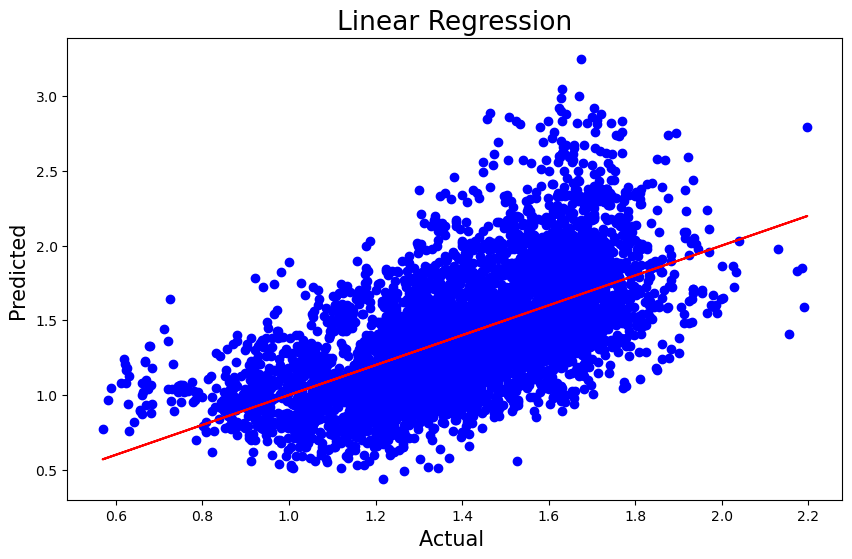

In [106]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_LR,y=y_reg_test,color='b')
plt.plot(pred_LR,pred_LR,color='r')
plt.xlabel('Actual ',fontsize=15)
plt.ylabel('Predicted ',fontsize=15)
plt.title("Linear Regression",fontsize=19)
plt.show()

In [107]:
RFR = RandomForestRegressor()
RFR.fit(x_reg_train,y_reg_train)
pred_RFR= RFR.predict(x_reg_test)
pred_train=RFR.predict(x_reg_train)
print('R2_score:',r2_score(y_reg_test,pred_RFR)) 
print('R2_score on training Data:',r2_score(y_reg_train,pred_train)*100) 
print('Mean_Absolute_Error:',mean_absolute_error(y_reg_test, pred_RFR)) 
print('Mean_Squared_Error:',mean_squared_error(y_reg_test, pred_RFR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_reg_test, pred_RFR)))

R2_score: 0.8154506148769932
R2_score on training Data: 97.17710977310509
Mean_Absolute_Error: 0.1256493333333333
Mean_Squared_Error: 0.0312986821716895
Root Mean Squared Error: 0.1769143356873306


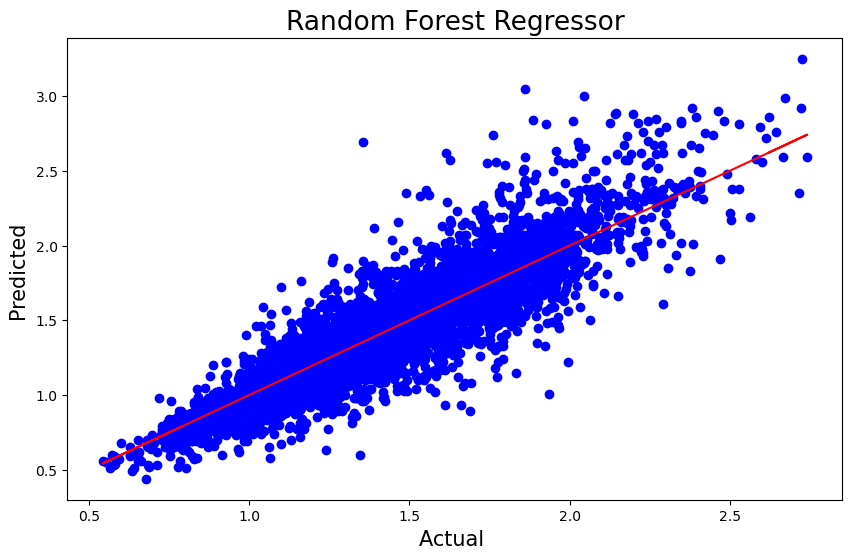

In [108]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_RFR,y=y_reg_test,color='b')
plt.plot(pred_RFR,pred_RFR,color='r')
plt.xlabel('Actual ',fontsize=15)
plt.ylabel('Predicted ',fontsize=15)
plt.title("Random Forest Regressor",fontsize=19)
plt.show()

In [109]:
knn = KNN()
knn.fit(x_reg_train,y_reg_train)
pred_knn= knn.predict(x_reg_test)
pred_train=knn.predict(x_reg_train)
print('R2_score:',r2_score(y_reg_test,pred_knn)) 
print('R2_score on training Data:',r2_score(y_reg_train,pred_train)*100) 
print('Mean_Absolute_Error:',mean_absolute_error(y_reg_test, pred_knn)) 
print('Mean_Squared_Error:',mean_squared_error(y_reg_test, pred_knn))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_reg_test, pred_knn)))

R2_score: 0.8239884274212604
R2_score on training Data: 87.98218508378604
Mean_Absolute_Error: 0.1226199086757991
Mean_Squared_Error: 0.029850710502283103
Root Mean Squared Error: 0.17277358160981413


In [110]:
GBR=GradientBoostingRegressor()
GBR.fit(x_reg_train,y_reg_train)
pred_GBR= GBR.predict(x_reg_test)
pred_train=GBR.predict(x_reg_train)
print('R2_score:',r2_score(y_reg_test,pred_GBR)) 
print('R2_score on training Data:',r2_score(y_reg_train,pred_train)*100) 
print('Mean_Absolute_Error:',mean_absolute_error(y_reg_test, pred_GBR)) 
print('Mean_Squared_Error:',mean_squared_error(y_reg_test, pred_GBR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_reg_test, pred_GBR)))

R2_score: 0.634351147793386
R2_score on training Data: 63.10699022070896
Mean_Absolute_Error: 0.18706482012330516
Mean_Squared_Error: 0.06201227494759709
Root Mean Squared Error: 0.24902263942781808


In [111]:
lasso=Lasso()
lasso.fit(x_reg_train,y_reg_train)
pred_lasso= lasso.predict(x_reg_test)
pred_train=lasso.predict(x_reg_train)
print('R2_score:',r2_score(y_reg_test,pred_lasso)) 
print('R2_score on training Data:',r2_score(y_reg_train,pred_train)*100) 
print('Mean_Absolute_Error:',mean_absolute_error(y_reg_test, pred_lasso)) 
print('Mean_Squared_Error:',mean_squared_error(y_reg_test, pred_lasso))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_reg_test, pred_lasso)))

R2_score: -6.141240084045485e-05
R2_score on training Data: 0.0
Mean_Absolute_Error: 0.33053482466168077
Mean_Squared_Error: 0.16960557347856875
Root Mean Squared Error: 0.4118319723850599


In [112]:
rd=Ridge()
rd.fit(x_reg_train,y_reg_train)
pred_rd= rd.predict(x_reg_test)
pred_train=rd.predict(x_reg_train)
print('R2_score:',r2_score(y_reg_test,pred_rd)) 
print('R2_score on training Data:',r2_score(y_reg_train,pred_train)*100) 
print('Mean_Absolute_Error:',mean_absolute_error(y_reg_test, pred_rd)) 
print('Mean_Squared_Error:',mean_squared_error(y_reg_test, pred_rd))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_reg_test, pred_rd)))

R2_score: 0.39001077516025995
R2_score on training Data: 35.36108240430893
Mean_Absolute_Error: 0.25253858960331704
Mean_Squared_Error: 0.1034512191069565
Root Mean Squared Error: 0.32163833587891305


In [113]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_reg_train,y_reg_train)
pred_DTR= dtr.predict(x_reg_test)
pred_train=dtr.predict(x_reg_train)
print('R2_score:',r2_score(y_reg_test,pred_DTR)) 
print('R2_score on training Data:',r2_score(y_reg_train,pred_train)*100) 
print('Mean_Absolute_Error:',mean_absolute_error(y_reg_test, pred_DTR)) 
print('Mean_Squared_Error:',mean_squared_error(y_reg_test, pred_DTR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_reg_test, pred_DTR)))

R2_score: 0.6375147443308731
R2_score on training Data: 100.0
Mean_Absolute_Error: 0.16531689497716892
Mean_Squared_Error: 0.06147574429223744
Root Mean Squared Error: 0.24794302630289372


In [114]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_reg_train,y_reg_train)
pred_SVR= svr.predict(x_reg_test)
pred_train=svr.predict(x_reg_train)
print('R2_score:',r2_score(y_reg_test,pred_SVR)) 
print('R2_score on training Data:',r2_score(y_reg_train,pred_train)*100) 
print('Mean_Absolute_Error:',mean_absolute_error(y_reg_test, pred_SVR)) 
print('Mean_Squared_Error:',mean_squared_error(y_reg_test, pred_SVR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_reg_test, pred_SVR)))

R2_score: 0.41624243740932043
R2_score on training Data: 38.43991217755283
Mean_Absolute_Error: 0.2402963720794093
Mean_Squared_Error: 0.09900245619711953
Root Mean Squared Error: 0.31464655758027854


# Cross Validation Score

In [115]:
from sklearn.model_selection import cross_val_score

In [116]:
score = cross_val_score(LR,x_reg,y_reg)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_reg_test,pred_LR) - score.mean())*100)

[-2.17781293 -0.04465209  0.45502226  0.01778746 -0.22633366]
-0.3951977914358231
Difference between R2 score and cross validation score is : 78.52242230667935


In [117]:
score = cross_val_score(RFR,x_reg,y_reg)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_reg_test,pred_RFR) - score.mean())*100)

[-0.70112933  0.32669872  0.52463607  0.0893879  -0.03281852]
0.04135496728267907
Difference between R2 score and cross validation score is : 77.40956475943142


In [118]:
score = cross_val_score(knn,x_reg,y_reg)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_reg_test,pred_knn) - score.mean())*100)

[-1.4461195   0.36697158  0.4770455   0.16833444 -0.09720135]
-0.10619386573896616
Difference between R2 score and cross validation score is : 93.01822931602265


In [119]:
score = cross_val_score(GBR,x_reg,y_reg)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_reg_test,pred_GBR) - score.mean())*100)

[-0.58903273  0.21423885  0.56581225  0.10009344  0.01324536]
0.06087143608763686
Difference between R2 score and cross validation score is : 57.34797117057491


In [120]:
score = cross_val_score(lasso,x_reg,y_reg)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_reg_test,pred_lasso) - score.mean())*100)

[-3.98236185 -0.75045983 -0.01749803 -0.47032699 -0.80592045]
-1.2053134266962335
Difference between R2 score and cross validation score is : 120.52520142953931


In [121]:
score = cross_val_score(rd,x_reg,y_reg)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_reg_test,pred_rd) - score.mean())*100)

[-2.17629361 -0.04462872  0.4550101   0.01798928 -0.22635798]
-0.3948561879272142
Difference between R2 score and cross validation score is : 78.48669630874741


In [122]:
score = cross_val_score(dtr,x_reg,y_reg)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_reg_test,pred_DTR) - score.mean())*100)

[-2.14822186  0.11415456  0.13604371 -0.5277211  -0.40462895]
-0.5660747278514044
Difference between R2 score and cross validation score is : 120.35894721822775


In [123]:
score = cross_val_score(svr,x_reg,y_reg)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_reg_test,pred_SVR) - score.mean())*100)

[-1.61393978 -0.0351637   0.40325155 -0.01305805 -0.27910751]
-0.3076034985070903
Difference between R2 score and cross validation score is : 72.38459359164106


Gradient Boosting Regressor(GBR) is our best model as the difference between R2 score and cross validation
score is : 57 and this is least out of all

finaly we observe that Gradient Boosting Regressor(GBR) is our best model

# Hyper Parameter Tuning

In [124]:
# Linear Regression
from sklearn.model_selection import GridSearchCV



In [125]:
parameters={'min_samples_split':[1,2,3,4],
            'learning_rate':[0.1,0.2,0.3,0.4],
            'n_estimators':[100,200,300,400],
            'max_depth':[3,4,5,6,7],                   
            'alpha':[0.9,1.0,1.1,1.2,]
            }

In [126]:
GCV=GridSearchCV(GradientBoostingRegressor(),parameters, cv =5)

GCV.fit(x_reg,y_reg)

GCV.best_params_

In [127]:
Final_model1= GradientBoostingRegressor(min_samples_split = 3,n_estimators= 200,learning_rate =0.3,max_depth=3,alpha= 0.9)
Final_model1.fit(x_reg_train,y_reg_train)
pred = Final_model1.predict(x_reg_test)
print('R2_score:',r2_score(y_reg_test,pred)) 
print('Mean_Absolute_Error:',mean_absolute_error(y_reg_test, pred)) 
print('Mean_Squared_Error:',mean_squared_error(y_reg_test, pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_reg_test, pred)))

R2_score: 0.7347859291705086
Mean_Absolute_Error: 0.1562873043814928
Mean_Squared_Error: 0.044979022307874254
Root Mean Squared Error: 0.21208258369765834


# Saving the model

In [128]:
#saving the model using .pkl
import joblib
joblib.dump(Final_model1,"Avocado_AveragePrice_Prediction_Project_Analysis.pkl")

['Avocado_AveragePrice_Prediction_Project_Analysis.pkl']

# predicting the saved model

In [129]:
# first we load the saved model and get prediction
model1= joblib.load("Avocado_AveragePrice_Prediction_Project_Analysis.pkl")

#prediction
prediction1 = model1.predict(x_reg_test)
prediction1

array([0.79535127, 0.82771265, 1.79161879, ..., 1.17499888, 1.68152102,
       2.38206528])

# these are the prediction for the number of Average Price

In [130]:
a1=np.array(y_reg_test)
df2 = pd.DataFrame()
df2["Predicted1"]  = prediction1
df2["Original1"] = a1
df2

,Predicted1,Original1
0,0.795351,0.82
1,0.827713,0.59
2,1.791619,1.88
3,1.497203,1.59
4,0.863594,0.62
...,...,...
5470,1.290876,1.28
5471,1.032590,0.96
5472,1.174999,1.26
5473,1.681521,2.33


our findings
for classification problem

Support Vector Classifier is our best model as the difference between accuracy score and cross 
validation score is =0.15786657756988537 and this is least out of all

finaly we observe that Support Vector Classifier is our best model

for regression model

Gradient Boosting Regressor(GBR) is our best model as the difference between R2 score and cross validation score is : 57 and this is least out of all

finaly we observe that Gradient Boosting Regressor(GBR) is our best model